# Задание 3
## Один Гармонический сигнал
### Исходный сигнал
Исходный сунисоидальный сигнал можно сгенернировать при помощи билиотек `matplotlib` и `numpy`

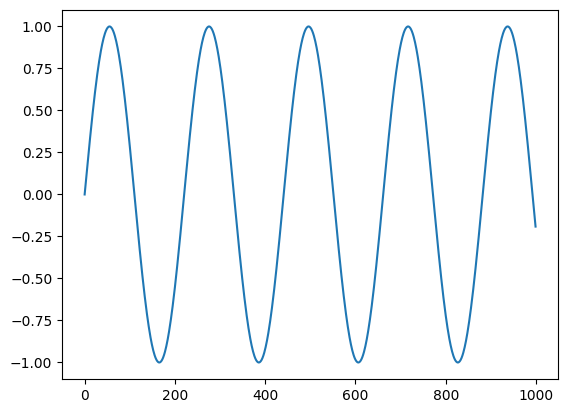

In [8]:
import numpy
from matplotlib import pyplot

FREQ     = 200   # Частота исходного сигнала 
RATE     = 44100 # Частота дискретизации сигнала 
DURATION = 20    # Длительность сигнала 

def generateTone(freq, rate, duration):
    xValues = numpy.linspace(0, duration, rate * duration, False)
    frequencies = xValues * freq 
    tones = numpy.sin(2 * numpy.pi * frequencies)
    return tones

initialTone = generateTone(FREQ, RATE, DURATION)

pyplot.plot(initialTone[:1000])
pyplot.show()


### Рассмотрим спектр исходного сигнала 
Алгоритм быстро преобразования фурье. Используем функцию `rfft` для разложения в ряд фурьер для положительных частот. Ось x для графика определим функцией `rfftfreq` 

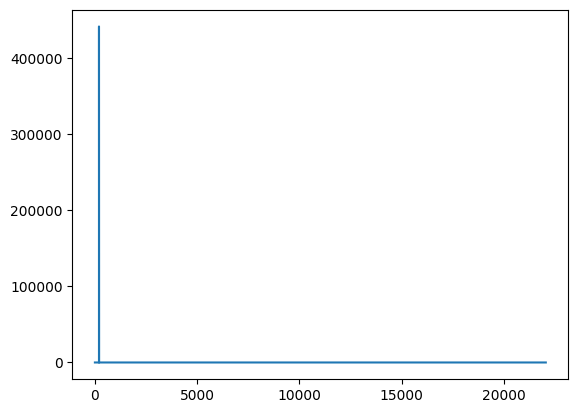

In [10]:
from scipy.fft import rfft, rfftfreq

N = RATE * DURATION 

yF = rfft(initialTone)
xF = rfftfreq(N, 1 / RATE)

pyplot.plot(xF, numpy.abs(yF))
pyplot.show()

### ДАЙТЕ ШУМУ
К исходному сигналу добавим шум параметризируемой частоты. Для того, чтобы шум действительно искажал исходынй сигнал, параметризуем его амплитуду.

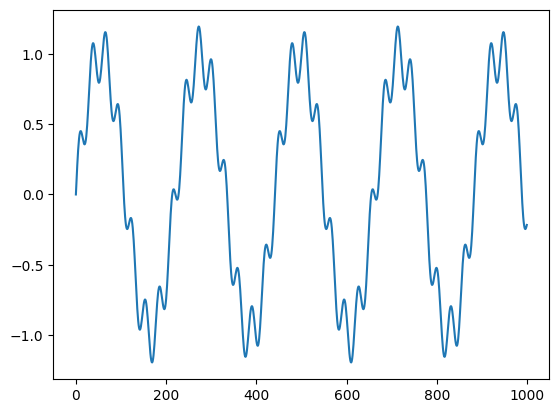

In [11]:
NOISE_FREQ = 1500
NOISE_TONE_AMP_MOD = 0.2

noiseTone = generateTone(NOISE_FREQ, RATE, DURATION)
noiseTone = noiseTone * NOISE_TONE_AMP_MOD

distortedTone = initialTone + noiseTone

pyplot.plot(distortedTone[:1000])
pyplot.show()

### Рассмотрим спект сигнала с шумом

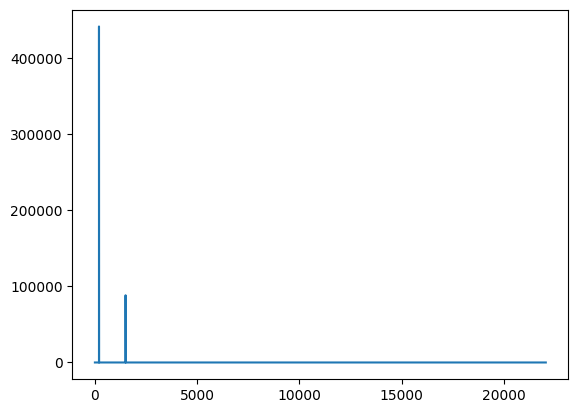

In [13]:
yF = rfft(distortedTone)
xF = rfftfreq(N, 1 / RATE)

pyplot.plot(xF, numpy.abs(yF))
pyplot.show()

### Восстановим сигнал
Чтобы удалить шум из сигнала, неоходимо:
1. определить кол-во точек на оси x, приходящихся на определенную частоту. Для этого раделим число точек на оси на максимальную частоту (половина частоты дискретизации). После этого найдем индекс частоты шума и обнулим значения спектра в некоторой окрестности этой точки.

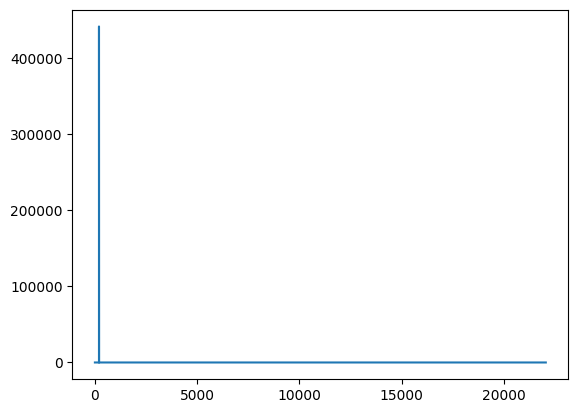

In [17]:
EPSILON = 10;

pointsPerFreq = len(xF) / (RATE / 2)

index = int(pointsPerFreq * NOISE_FREQ)
yF[index - EPSILON:index + EPSILON] = 0

pyplot.plot(xF, numpy.abs(yF))
pyplot.show()

2. Необходимо произвести обратное преобразование фурье и восстановить "отчищенный" сигнал по полученному спектру.

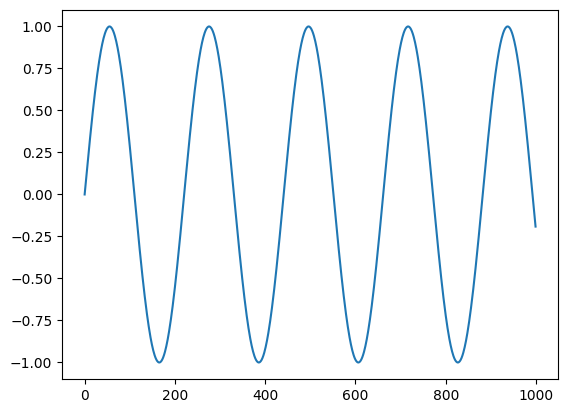

In [19]:
from scipy.fft import irfft

clearedSignal = irfft(yF)

pyplot.plot(clearedSignal[:1000])
pyplot.show()

## N Гармонических сигналов

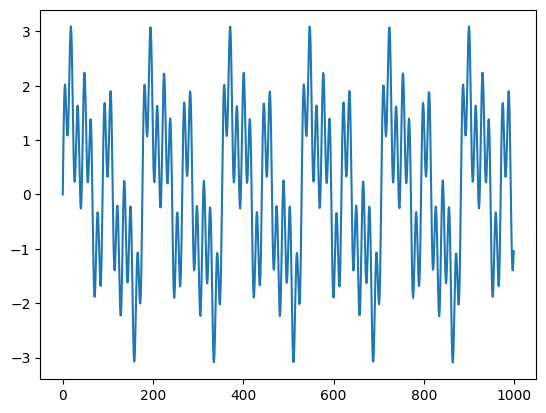

In [25]:
INITIAL_FREQS=[250, 500, 1000, 3000]
initialTone=generateTone(INITIAL_FREQS[0], RATE, DURATION)
for freq in INITIAL_FREQS[1:]:
    initialTone += generateTone(freq, RATE, DURATION)

pyplot.plot(initialTone[:1000])
pyplot.show()


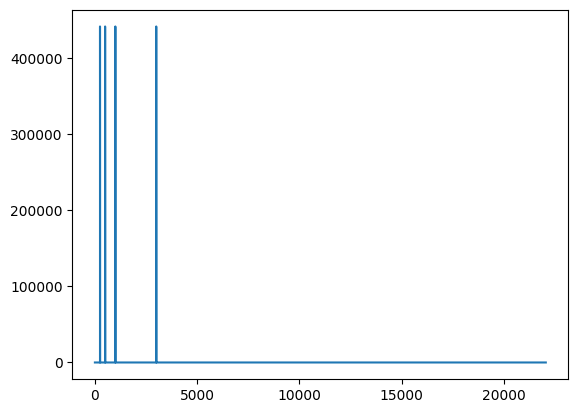

In [28]:
yF = rfft(initialTone)
xF = rfftfreq(N, 1 / RATE)

pyplot.plot(xF, numpy.abs(yF))
pyplot.show()

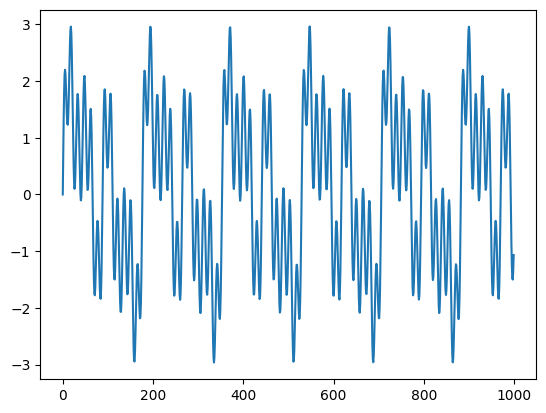

In [30]:
noiseTone = generateTone(NOISE_FREQ, RATE, DURATION)
noiseTone = noiseTone * NOISE_TONE_AMP_MOD

distortedTone = initialTone + noiseTone

pyplot.plot(distortedTone[:1000])
pyplot.show()

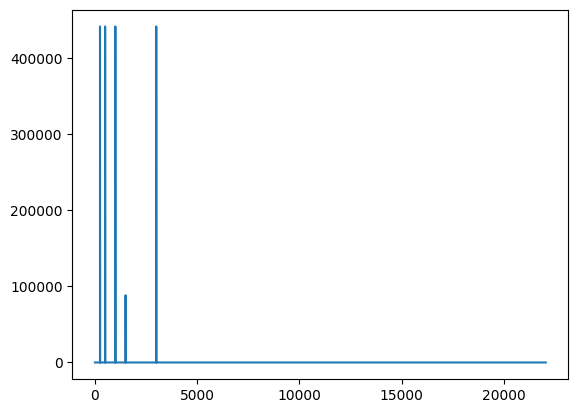

In [31]:
yF = rfft(distortedTone)
xF = rfftfreq(N, 1 / RATE)

pyplot.plot(xF, numpy.abs(yF))
pyplot.show()

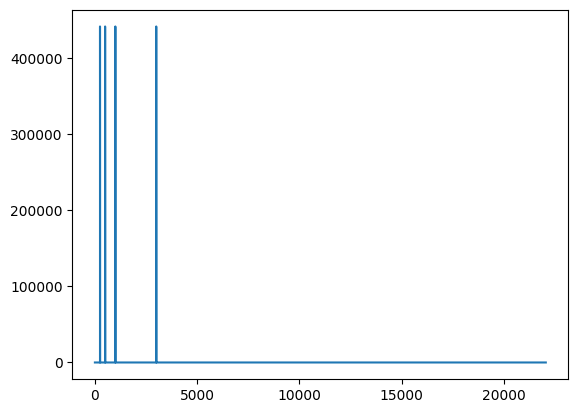

In [32]:
EPSILON = 10;

pointsPerFreq = len(xF) / (RATE / 2)

index = int(pointsPerFreq * NOISE_FREQ)
yF[index - EPSILON:index + EPSILON] = 0

pyplot.plot(xF, numpy.abs(yF))
pyplot.show()

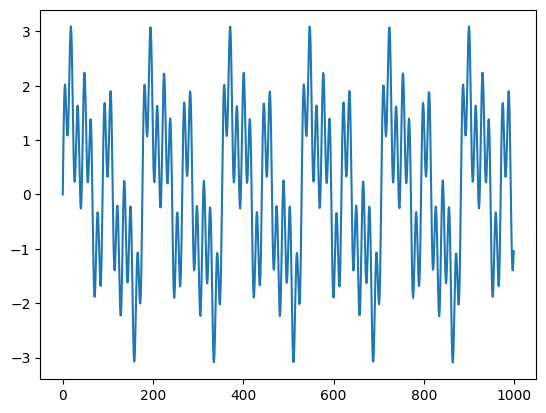

In [33]:
from scipy.fft import irfft

clearedSignal = irfft(yF)

pyplot.plot(clearedSignal[:1000])
pyplot.show()